ETL 7. Vehicle Fuel Economy Data


In [1]:
import pandas as pd
import numpy as np

import funciones_propias as fp
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
direccion = '7. Vehicle Fuel Economy Data.csv'


df_vehicle = pd.read_csv(direccion)

print(df_vehicle.head())


   Year Manufacturer                          Model  barrels08  barrelsA08  \
0  2017          BMW                       M6 Coupe  17.500588         0.0   
1  2017          BMW                   X3 sDrive28i  12.396250         0.0   
2  2016     Infiniti                 Q50S Red Sport  13.523182         0.0   
3  2017         MINI  John Cooper Works Convertible  11.018889         0.0   
4  2017          Kia                      Sedona SX  14.167143         0.0   

   charge240  city08  city08U  cityA08  cityA08U  ...  mfrCode  c240Dscr  \
0        0.0    15.0     14.0      0.0       0.0  ...      BMX       NaN   
1        0.0    21.0     21.0      0.0       0.0  ...      BMX       NaN   
2        0.0    20.0     19.0      0.0       0.0  ...      NSX       NaN   
3        0.0    24.0     23.0      0.0       0.0  ...      BMX       NaN   
4        0.0    18.0     18.0      0.0       0.0  ...      KMX       NaN   

   charge240b  c240bDscr   createdOn  modifiedOn  startStop  phevCity  \
0

C:\Users\Eduardo\AppData\Local\Temp\ipykernel_9700\1102775223.py:4: DtypeWarning: Columns (73,75) have mixed types. Specify dtype option on import or set low_memory=False.
  df_vehicle = pd.read_csv(direccion)


Creo un índice para poder hacer el merge con la otra parte

In [3]:
df_vehicle.insert(0, 'ID', range(1, len(df_vehicle) + 1))


Columnas a conservar
columnas_mantener = ['ID', 'Year', 'Manufacturer', 'Model', 'fuelType1', 'fuelType2', 'co2', 'co2A',
                     'cylinders', 'displ', 'drive', 'VClass', 'range', 'rangeCity', 'rangeHwy',
                     'mpgData', 'phevBlended', 'guzzler']



In [4]:
variables = [
    'ID', 'Year', 'Manufacturer', 'Model', 'fuelType1', 'fuelType2', 'co2', 'co2A', 'cylinders', 'drive', 
    'VClass', 'range', 'rangeCity', 'rangeHwy', 'phevBlended', 'guzzler', 'city08', 'cityA08', 'cityCD', 
    'cityE', 'comb08U', 'combA08U', 'combE', 'fuelCost08', 'fuelCostA08', 'ghgScore', 'lv2', 'pv2', 'phevComb'
]


df_vehicle = df_vehicle[variables]



In [5]:
fp.sin_limites()
fp.tipos_cols(df_vehicle)

,Columna,Tipo de Valor,Cantidad,Porcentaje de NaN,Más de un tipo de valor (no NaN)
0,ID,<class 'int'>,46186,0.00%,No
1,ID,NaN,0,0.00%,No
2,Year,<class 'int'>,46186,0.00%,No
3,Year,NaN,0,0.00%,No
4,Manufacturer,<class 'str'>,46186,0.00%,No
5,Manufacturer,NaN,0,0.00%,No
6,Model,<class 'str'>,46176,0.02%,Sí
7,Model,<class 'float'>,10,0.02%,Sí
8,Model,NaN,10,0.02%,Sí
9,fuelType1,<class 'str'>,44953,2.67%,Sí


dejando un solo tipo de dato

In [6]:
columns_to_convert = ['Model', 'fuelType1', 'fuelType2', 'drive', 'VClass', 'phevBlended', 'guzzler']

for column in columns_to_convert:
    df_vehicle[column] = df_vehicle[column].astype(str)


In [7]:
fp.frecuencia_unicos(df_vehicle["fuelType1"])

Tipos de Valores:
   Tipo de Valor
0  <class 'str'>

Frecuencia de Valores Únicos:
         Valor Único  Frecuencia
0   Regular Gasoline       29488
1   Premium Gasoline       13645
2                nan        1233
3             Diesel        1100
4        Electricity         503
5  Midgrade Gasoline         157
6        Natural Gas          60


In [8]:
df_vehicle.loc[df_vehicle['fuelType2'] == 'Electricity', 'co2A'] = 0


# EDA.

In [9]:

df_vehicle['co2'] = df_vehicle['co2'].replace(-1, np.nan)
df_vehicle['co2'] = df_vehicle['co2'].replace(0, np.nan)
df_vehicle['co2A'] = df_vehicle['co2A'].replace(-1, np.nan)
df_vehicle['ghgScore'] = df_vehicle['ghgScore'].replace(-1, np.nan)

df_vehicle['range'] = df_vehicle['range'].replace(0, np.nan)
df_vehicle['rangeCity'] = df_vehicle['rangeCity'].replace(0, np.nan)
df_vehicle['rangeHwy'] = df_vehicle['rangeHwy'].replace(0, np.nan)
df_vehicle['cityA08'] = df_vehicle['cityA08'].replace(0, np.nan)
df_vehicle['cityCD'] = df_vehicle['cityCD'].replace(0, np.nan)
df_vehicle['cityE'] = df_vehicle['cityE'].replace(0, np.nan)
df_vehicle['combE'] = df_vehicle['combE'].replace(0, np.nan)
df_vehicle['comb08U'] = df_vehicle['comb08U'].replace(0, np.nan)
df_vehicle['combA08U'] = df_vehicle['combA08U'].replace(0, np.nan)
df_vehicle['fuelCostA08'] = df_vehicle['fuelCostA08'].replace(0, np.nan)
df_vehicle['lv2'] = df_vehicle['lv2'].replace(0, np.nan)
df_vehicle['pv2'] = df_vehicle['pv2'].replace(0, np.nan)
df_vehicle['phevComb'] = df_vehicle['phevComb'].replace(0, np.nan)




## estadisticos    

In [10]:
fp.analisis_estadistico(df_vehicle)

,Columna,Tipo de Dato,Min,Max,Media,Mediana,Desviación Estándar,Valores Faltantes,Valores Únicos,Frecuencia de -1
0,ID,int64,1.0,46186.0,23093.500000,23093.5,13332.894103,0,46186,0
1,Year,int64,1984.0,2024.0,2003.733079,2005.0,12.252017,0,41,0
2,co2,float64,22.0,979.0,405.987333,399.0,104.611002,32449,602,0
3,co2A,float64,0.0,713.0,323.192426,399.0,226.093603,45209,216,0
4,cylinders,float64,2.0,16.0,5.706896,6.0,1.771698,523,9,0
5,range,float64,29.0,520.0,225.491054,239.0,96.461083,45683,177,0
6,rangeCity,float64,42.0,520.0,228.574850,247.5,99.081148,45852,145,0
7,rangeHwy,float64,31.0,520.0,212.598802,228.0,98.404330,45852,140,0
8,city08,float64,6.0,153.0,19.167493,18.0,10.448985,17,133,0
9,cityA08,float64,7.0,145.0,21.190968,12.0,24.785174,44348,81,0


Year: Representa el año de fabricación de los vehículos. Los años van desde 1984 hasta 2024, con una media de 2003.73. La desviación estándar es relativamente baja, alrededor de 12.25, lo que sugiere que la mayoría de los vehículos se encuentran cerca de la media. No hay valores faltantes, y hay 41 años únicos en el conjunto de datos.

co2: Esta variable representa las emisiones de dióxido de carbono (CO2) en gramos por milla para el combustible convencional del vehículo. Los valores varían desde 22.0 hasta 979.0, con una media de aproximadamente 406.0. La desviación estándar es moderada, alrededor de 104.61, lo que indica cierta variabilidad en las emisiones de CO2. Se registran 32,449 valores faltantes, y hay 602 valores únicos en la columna.

co2A: Similar a la variable anterior, pero para emisiones de CO2 en vehículos con combustibles alternativos. Los valores oscilan entre 0.0 y 713.0, con una media de aproximadamente 323.2. La desviación estándar es alta, alrededor de 226.09, lo que indica una variabilidad significativa en las emisiones de CO2A. Se registran 45,209 valores faltantes, y hay 216 valores únicos en la columna.

cylinders: Representa el número de cilindros en el motor del vehículo. Los valores varían desde 2.0 hasta 16.0, con una media de aproximadamente 5.71. La desviación estándar es baja, alrededor de 1.77, lo que sugiere que la mayoría de los vehículos tienen un número de cilindros cercano a la media. No hay valores faltantes, y hay 9 valores únicos en la columna.

range: Representa la autonomía en millas de los vehículos. Los valores varían desde 29.0 hasta 520.0, con una media de aproximadamente 225.5. La desviación estándar es moderada, alrededor de 96.46, lo que indica cierta variabilidad en la autonomía de los vehículos. Se registran 45,683 valores faltantes en esta columna.

rangeCity: Similar a "range," pero representa la autonomía en condiciones de conducción urbana. Los valores varían desde 42.0 hasta 520.0, con una media de aproximadamente 228.57. La desviación estándar es moderada, alrededor de 99.08. Hay 45,852 valores faltantes en esta columna.

rangeHwy: Similar a "range," pero representa la autonomía en condiciones de conducción en carretera. Los valores varían desde 31.0 hasta 520.0, con una media de aproximadamente 212.60. La desviación estándar es moderada, alrededor de 98.40. Hay 45,852 valores faltantes en esta columna.

city08: Representa el consumo de combustible en millas por galón en condiciones urbanas. Los valores varían desde 6.0 hasta 153.0, con una media de aproximadamente 19.17. La desviación estándar es moderada, alrededor de 10.45. Hay 17 valores faltantes en esta columna.

cityA08: Similar a "city08," pero para vehículos con combustibles alternativos. Los valores varían desde 7.0 hasta 145.0, con una media de aproximadamente 21.19. La desviación estándar es alta, alrededor de 24.79. Hay 44,348 valores faltantes en esta columna.

cityCD: Representa el consumo de combustible en millas por galón en condiciones de conducción continua. Los valores varían desde 1.0 hasta 5.0, con una media de aproximadamente 3.67. La desviación estándar es moderada, alrededor de 2.31. Hay 46,183 valores faltantes en esta columna.

cityE: Representa el consumo de electricidad en millas por galón equivalente en vehículos eléctricos. Los valores varían desde 21.0 hasta 122.0, con una media de aproximadamente 40.54. La desviación estándar es moderada, alrededor de 15.15. Hay 45,387 valores faltantes en esta columna.

comb08U: Representa el consumo combinado de combustible en millas por galón para vehículos con combustibles alternativos. Los valores varían desde 9.0 hasta 141.0, con una media de aproximadamente 24.57. La desviación estándar es moderada, alrededor de 14.47. Hay 29,663 valores faltantes en esta columna.

combA08U: Similar a "comb08U," pero para vehículos con combustibles alternativos. Los valores varían desde 8.0 hasta 133.0, con una media de aproximadamente 26.31. La desviación estándar es alta, alrededor de 26.82. Hay 44,898 valores faltantes en esta columna.

combE: Representa el consumo de electricidad combinado en millas por galón equivalente en vehículos eléctricos. Los valores varían desde 23.0 hasta 121.0, con una media de aproximadamente 41.26. La desviación estándar es moderada, alrededor de 13.98. Hay 45,387 valores faltantes en esta columna.

fuelCost08: Representa los costos anuales estimados de combustible en dólares para vehículos convencionales. Los valores varían desde 500.0 hasta 9,350.0, con una media de aproximadamente 2,937.27. La desviación estándar es alta, alrededor de 850.01. Hay 1,233 valores faltantes en esta columna.

fuelCostA08: Similar a "fuelCost08," pero para vehículos con combustibles alternativos. Los valores varían desde 600.0 hasta 5,000.0, con una media de aproximadamente 3,202.87. La desviación estándar es alta, alrededor de 762.26. Hay 44,585 valores faltantes en esta columna.

ghgScore: Representa la puntuación de emisiones de gases de efecto invernadero (GHG) asignada por la EPA. Los valores varían desde 1.0 hasta 10.0, con una media de aproximadamente 5.06. La desviación estándar es moderada, alrededor de 1.97. Hay 32,019 valores faltantes en esta columna.

lv2: Representa el volumen de carga de los vehículos. Los valores varían desde 2.0 hasta 41.0, con una media de aproximadamente 10.93. La desviación estándar es moderada, alrededor de 3.79. Hay 39,124 valores faltantes en esta columna.

pv2: Representa el volumen de pasajeros de los vehículos. Los valores varían desde 1.0 hasta 194.0, con una media de aproximadamente 82.77. La desviación estándar es moderada, alrededor de 12.55. Hay 39,127 valores faltantes en esta columna.

phevComb: Representa el consumo de combustible en millas por galón equivalente en vehículos híbridos enchufables. Los valores varían desde 17.0 hasta 88.0, con una media de aproximadamente 43.09. La desviación estándar es moderada, alrededor de 17.60. No hay valores faltantes en esta columna.

In [11]:
fp.analisis_frecuencia_top3(df_vehicle)

g:\Mi unidad\Poryecto grupal\funciones_propias.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3['Variable'] = columna
g:\Mi unidad\Poryecto grupal\funciones_propias.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3['Variable'] = columna
g:\Mi unidad\Poryecto grupal\funciones_propias.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,Variable,Valor,Frecuencia,Porcentaje
0,Manufacturer,Chevrolet,4341,40.116440
1,Manufacturer,Ford,3751,34.664079
2,Manufacturer,GMC,2729,25.219481
3,Model,F150 Pickup 2WD,233,35.196375
4,Model,F150 Pickup 4WD,215,32.477341
5,Model,Camaro,214,32.326284
6,fuelType1,Regular Gasoline,29488,66.465311
7,fuelType1,Premium Gasoline,13645,30.755534
8,fuelType1,nan,1233,2.779155
9,fuelType2,nan,44539,96.484121


- La variable Manufacturer indica el fabricante del vehículo. Los tres fabricantes más frecuentes son Chevrolet, Ford y GMC, que representan el 40.12%, el 34.66% y el 25.22% de los datos, respectivamente. Esto significa que estos son los fabricantes más populares o más vendidos en el mercado.

- La variable Model indica el nombre del modelo del vehículo. Los tres modelos más frecuentes son F150 Pickup 2WD, F150 Pickup 4WD y Camaro, que representan el 35.20%, el 32.48% y el 32.33% de los datos, respectivamente. Esto significa que estos son los modelos más demandados o más preferidos por los consumidores.

- La variable fuelType1 indica el tipo de combustible principal utilizado por el vehículo. El tipo de combustible más frecuente es Regular Gasoline, que representa el 66.47% de los datos. Esto significa que la mayoría de los vehículos usan gasolina regular como combustible convencional. El segundo tipo de combustible más frecuente es Premium Gasoline, que representa el 30.76% de los datos. Esto significa que una parte significativa de los vehículos usan gasolina premium como combustible convencional. El tercer tipo de combustible más frecuente es nan, que representa el 2.78% de los datos. Esto significa que hay algunos vehículos que no tienen información sobre su tipo de combustible principal.

- La variable fuelType2 indica el tipo de combustible alternativo utilizado por el vehículo, si es aplicable. El tipo de combustible más frecuente es nan, que representa el 96.48% de los datos. Esto significa que la mayoría de los vehículos no usan ningún tipo de combustible alternativo. El segundo tipo de combustible más frecuente es E85, que representa el 2.87% de los datos. Esto significa que hay algunos vehículos que usan etanol como combustible alternativo. El tercer tipo de combustible más frecuente es Electricity, que representa el 0.64% de los datos. Esto significa que hay muy pocos vehículos que usan electricidad como combustible alternativo.

- La variable drive indica el tipo de eje de transmisión del vehículo. El tipo de eje más frecuente es Front-Wheel Drive, que representa el 41.31% de los datos. Esto significa que la mayoría de los vehículos tienen tracción delantera. El segundo tipo de eje más frecuente es Rear-Wheel Drive, que representa el 40.72% de los datos. Esto significa que una parte casi igual de los vehículos tienen tracción trasera. El tercer tipo de eje más frecuente es 4-Wheel or All-Wheel Drive, que representa el 17.97% de los datos. Esto significa que una parte menor de los vehículos tienen tracción en las cuatro ruedas.

- La variable VClass indica la clasificación de tamaño del vehículo asignada por la EPA. La clase más frecuente es Compact Cars, que representa el 36.36% de los datos. Esto significa que la mayoría de los vehículos son de tamaño compacto. La segunda clase más frecuente es Midsize Cars, que representa el 32.22% de los datos. Esto significa que una parte importante de los vehículos son de tamaño mediano. La tercera clase más frecuente es Subcompact Cars, que representa el 31.41% de los datos. Esto significa que una parte casi igual de los vehículos son de tamaño subcompacto.

- La variable mpgData indica si el vehículo tiene datos de consumo de combustible reportados por la EPA o por el fabricante. El valor más frecuente es N, que representa el 65.84% de los datos. Esto significa que la mayoría de los vehículos no tienen datos de consumo de combustible reportados por la EPA. El segundo valor más frecuente es Y, que representa el 29.82% de los datos. Esto significa que una parte significativa de los vehículos sí tienen datos de consumo de combustible reportados por la EPA. El tercer valor más frecuente es nan, que representa el 4.35% de los datos. Esto significa que hay algunos vehículos que no tienen información sobre su fuente de datos de consumo de combustible.

- La variable phevBlended indica si el vehículo utiliza una combinación de electricidad y gasolina para impulsarse, o solo electricidad cuando la batería está cargada. El valor más frecuente es False, que representa el 95.17% de los datos. Esto significa que la mayoría de los vehículos no son híbridos enchufables combinados. El segundo valor más frecuente es nan, que representa el 4.32% de los datos. Esto significa que hay algunos vehículos que no tienen información sobre su modo de propulsión. El tercer valor más frecuente es True, que representa el 0.51% de los datos. Esto significa que hay muy pocos vehículos que son híbridos enchufables combinados.

- La variable guzzler indica si el vehículo tiene un consumo de combustible muy alto y está sujeto a un impuesto especial por ello, según la ley de Estados Unidos. El valor más frecuente es nan, que representa el 94.32% de los datos. Esto significa que la mayoría de los vehículos no son tragones de gasolina. El segundo valor más frecuente es G, que representa el 3.74% de los datos. Esto significa que hay algunos vehículos que son tragones de gasolina y pagan un impuesto de 1000 dólares. El tercer valor más frecuente es T, que representa el 1.94% de los datos. Esto significa que hay algunos vehículos que son tragones de gasolina y pagan un impuesto de 1300 dólares.


## Gráficos


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

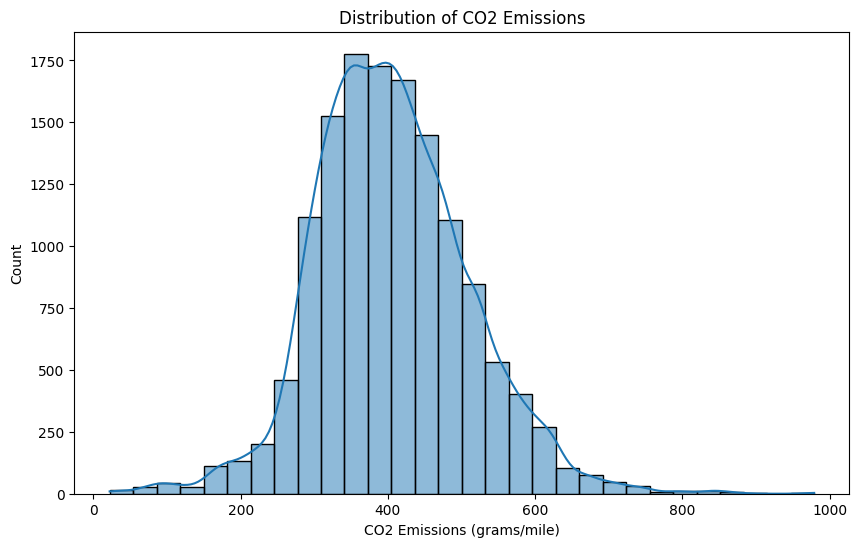

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_vehicle['co2'], kde=True, bins=30)
plt.xlabel('CO2 Emissions (grams/mile)')
plt.title('Distribution of CO2 Emissions')
plt.show()


## 1

Año de Fabricación vs. Emisiones de CO2:

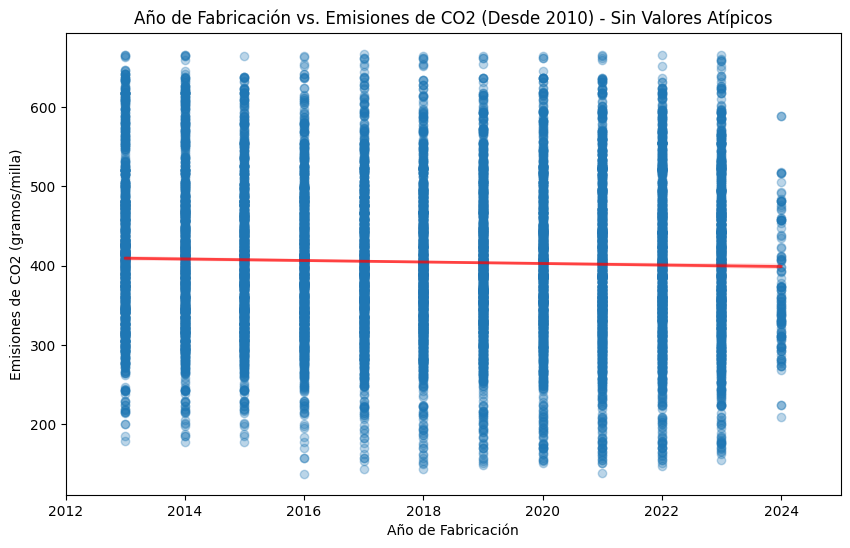

In [14]:
# Filtrar el DataFrame para años a partir de 2013
df_vehicle_filtered = df_vehicle[df_vehicle['Year'] >= 2013]

# Calcular el IQR (rango intercuartílico) de la columna 'co2'
Q1 = df_vehicle_filtered['co2'].quantile(0.25)
Q3 = df_vehicle_filtered['co2'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para considerar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos en la columna 'co2'
df_vehicle_filtered = df_vehicle_filtered[(df_vehicle_filtered['co2'] >= lower_bound) & (df_vehicle_filtered['co2'] <= upper_bound)]

# Crear el gráfico con los datos filtrados
plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='co2', data=df_vehicle_filtered, scatter_kws={'alpha': 0.3}, line_kws={"color": "r", "alpha": 0.7, "lw": 2})
plt.title('Año de Fabricación vs. Emisiones de CO2 (Desde 2010) - Sin Valores Atípicos')
plt.xlabel('Año de Fabricación')
plt.ylabel('Emisiones de CO2 (gramos/milla)')
plt.xlim(2012,2025)  # Asegurarse de que el eje x comience en 2013
plt.show()

Variabilidad: Existe una variabilidad considerable en las emisiones de CO2 entre los vehículos de un mismo año. Esto se evidencia por la dispersión vertical de los puntos para cada año. Algunos vehículos emiten significativamente más CO2 que otros dentro del mismo año de fabricación.

Distribución de Datos: Los datos no están uniformemente distribuidos a lo largo de los años. Parece haber años con mayor concentración de datos, lo cual podría reflejar una mayor cantidad de modelos de vehículos lanzados o una mejor recolección de datos en ciertos años.

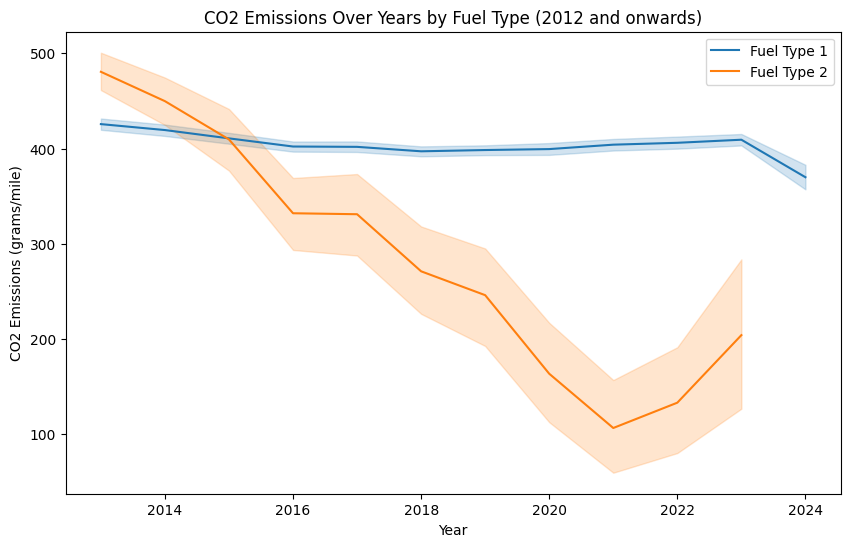

In [15]:

# Filtra los datos para incluir solo años a partir de 2012
df_filtered = df_vehicle[df_vehicle['Year'] >= 2013]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_filtered, x='Year', y='co2', label='Fuel Type 1')
sns.lineplot(data=df_filtered, x='Year', y='co2A', label='Fuel Type 2')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (grams/mile)')
plt.title('CO2 Emissions Over Years by Fuel Type (2012 and onwards)')
plt.legend()
plt.show()



Recordar aquí que el tipo 2 contempla el e85, por lo tanto se entiende que sea más bajo pero no totalmente en 0, ya que promedia tanto electicos como hibridos

## 2


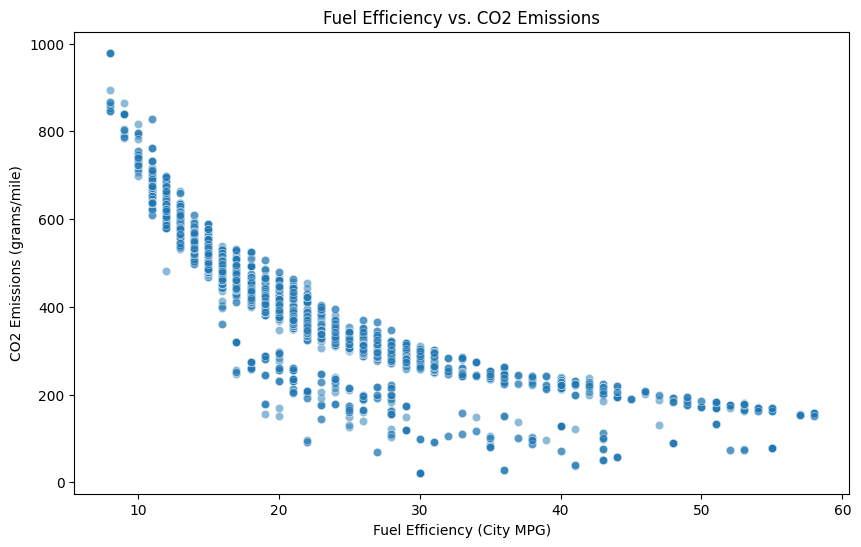

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_vehicle, x='city08', y='co2', alpha=0.5)
plt.xlabel('Fuel Efficiency (City MPG)')
plt.ylabel('CO2 Emissions (grams/mile)')
plt.title('Fuel Efficiency vs. CO2 Emissions')
plt.show()


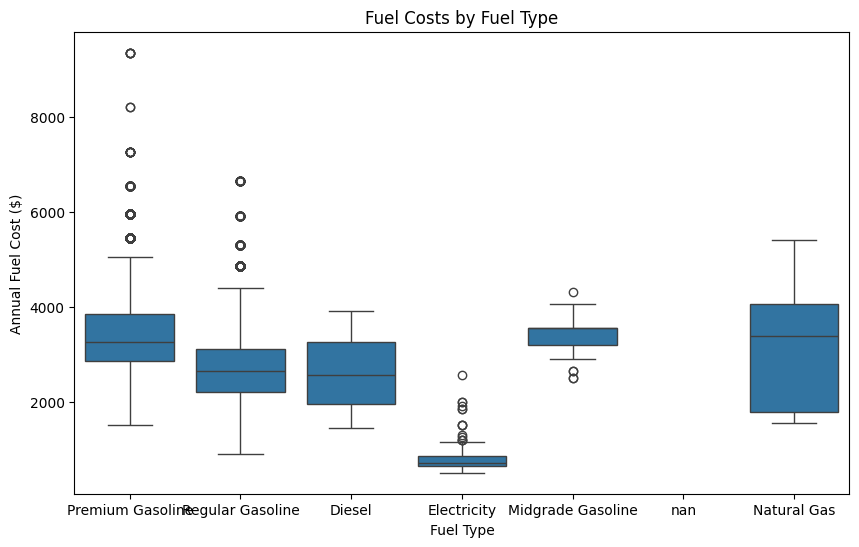

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_vehicle, x='fuelType1', y='fuelCost08')
plt.xlabel('Fuel Type')
plt.ylabel('Annual Fuel Cost ($)')
plt.title('Fuel Costs by Fuel Type')
plt.show()


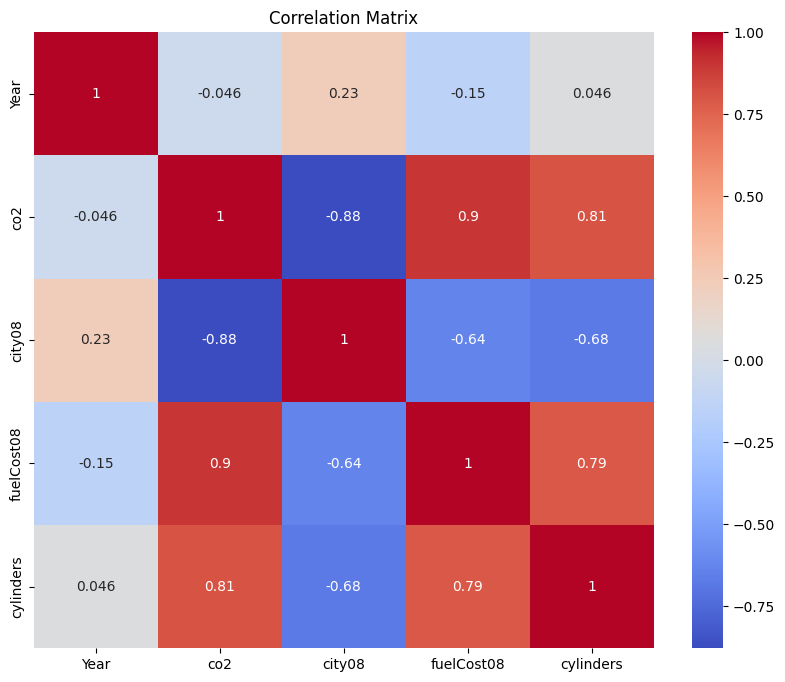

In [18]:
# Seleccionando algunas variables para la correlación
columns_of_interest = ['Year', 'co2', 'city08', 'fuelCost08', 'cylinders']
correlation_matrix = df_vehicle[columns_of_interest].corr()

# Graficando la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


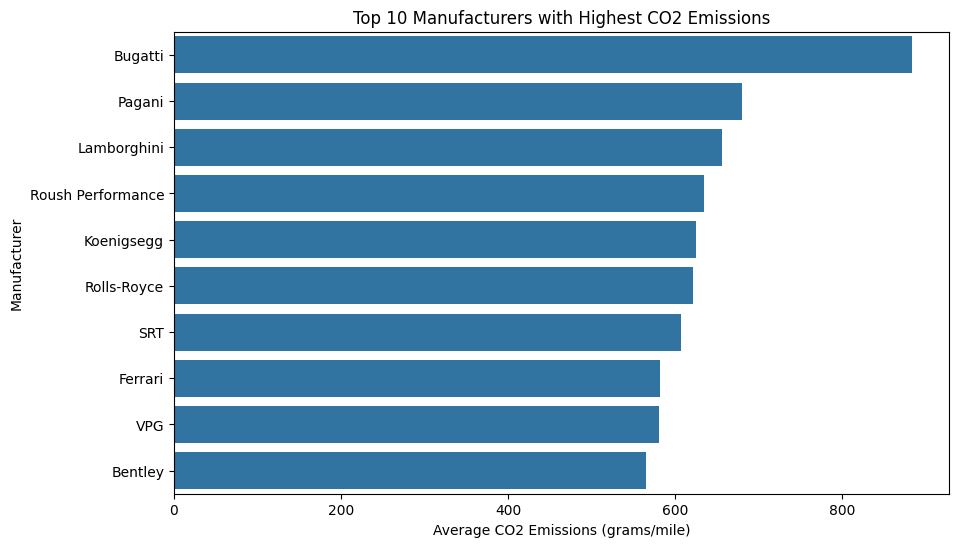

In [19]:
# Calculando la media de emisiones de CO2 por marca
top_co2_brands = df_vehicle.groupby('Manufacturer')['co2'].mean().sort_values(ascending=False).head(10)

# Graficando las marcas con mayores emisiones
plt.figure(figsize=(10, 6))
sns.barplot(x=top_co2_brands.values, y=top_co2_brands.index)
plt.xlabel('Average CO2 Emissions (grams/mile)')
plt.ylabel('Manufacturer')
plt.title('Top 10 Manufacturers with Highest CO2 Emissions')
plt.show()


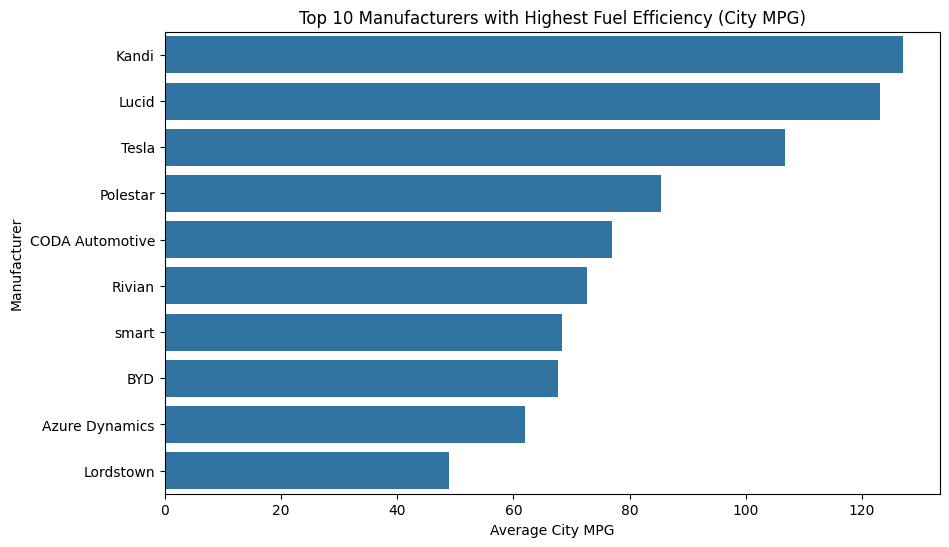

In [20]:
# Calculando la eficiencia promedio en ciudad por marca
top_fuel_efficiency_brands = df_vehicle.groupby('Manufacturer')['city08'].mean().sort_values(ascending=False).head(10)

# Graficando las marcas con mayor eficiencia de combustible
plt.figure(figsize=(10, 6))
sns.barplot(x=top_fuel_efficiency_brands.values, y=top_fuel_efficiency_brands.index)
plt.xlabel('Average City MPG')
plt.ylabel('Manufacturer')
plt.title('Top 10 Manufacturers with Highest Fuel Efficiency (City MPG)')
plt.show()


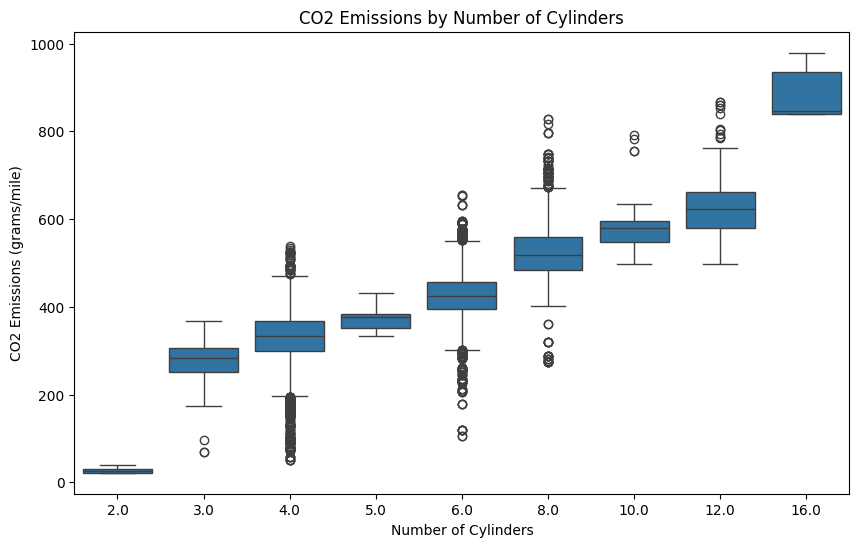

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_vehicle, x='cylinders', y='co2')
plt.xlabel('Number of Cylinders')
plt.ylabel('CO2 Emissions (grams/mile)')
plt.title('CO2 Emissions by Number of Cylinders')
plt.show()

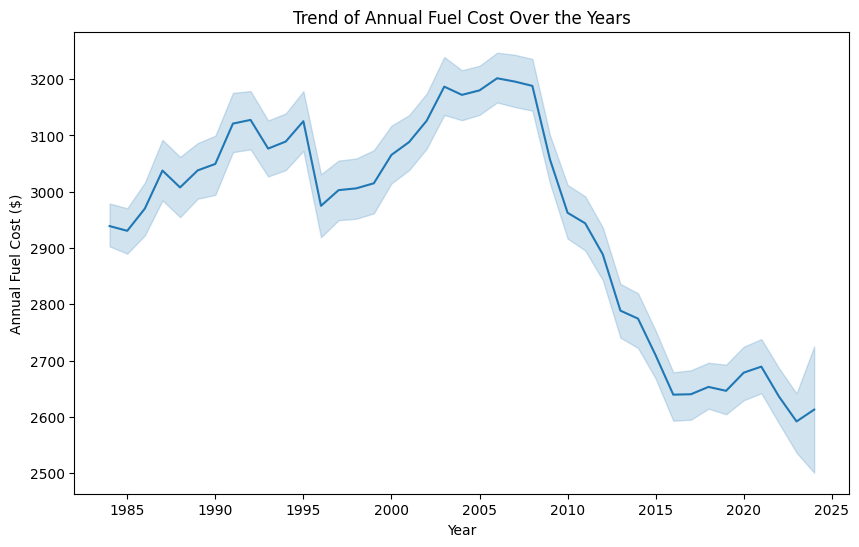

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_vehicle, x='Year', y='fuelCost08')
plt.xlabel('Year')
plt.ylabel('Annual Fuel Cost ($)')
plt.title('Trend of Annual Fuel Cost Over the Years')
plt.show()


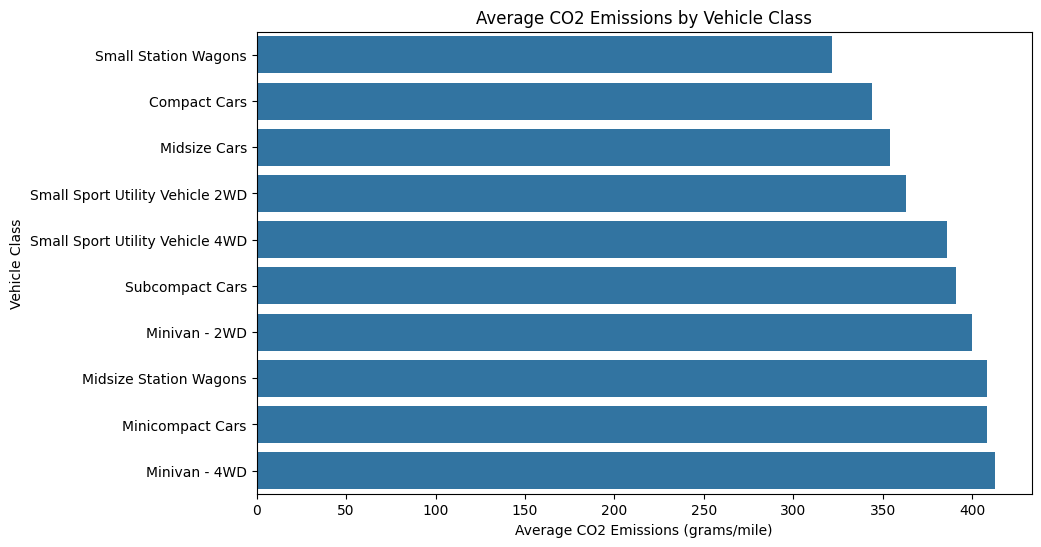

In [23]:
# Emisiones por clase de vehículo
avg_emissions_by_class = df_vehicle.groupby('VClass')['co2'].mean().sort_values().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_emissions_by_class.values, y=avg_emissions_by_class.index)
plt.xlabel('Average CO2 Emissions (grams/mile)')
plt.ylabel('Vehicle Class')
plt.title('Average CO2 Emissions by Vehicle Class')
plt.show()


comparación


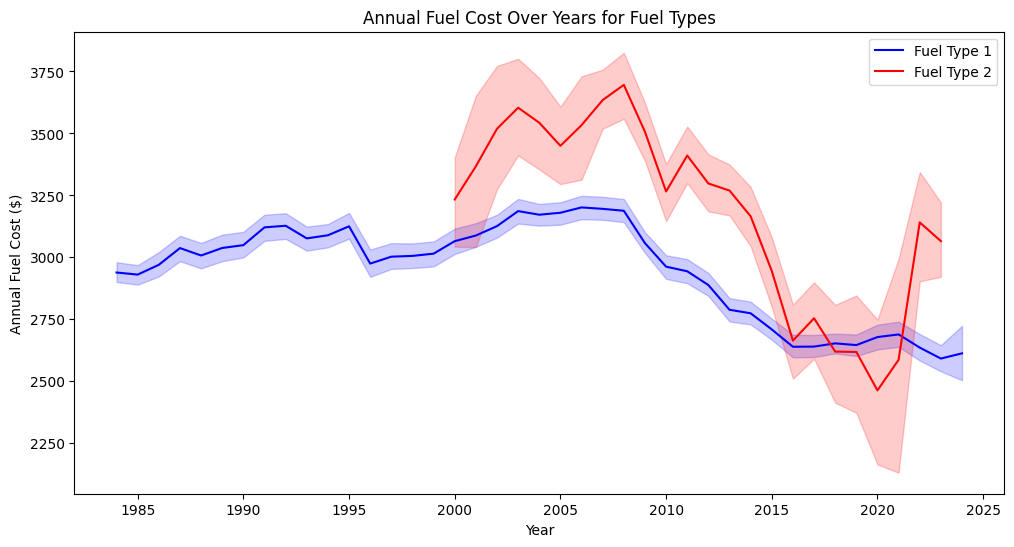

In [24]:
plt.figure(figsize=(12, 6))
# Combustible Tipo 1
sns.lineplot(data=df_vehicle, x='Year', y='fuelCost08', label='Fuel Type 1', color='blue')
# Combustible Tipo 2
sns.lineplot(data=df_vehicle, x='Year', y='fuelCostA08', label='Fuel Type 2', color='red')
plt.xlabel('Year')
plt.ylabel('Annual Fuel Cost ($)')
plt.title('Annual Fuel Cost Over Years for Fuel Types')
plt.legend()
plt.show()


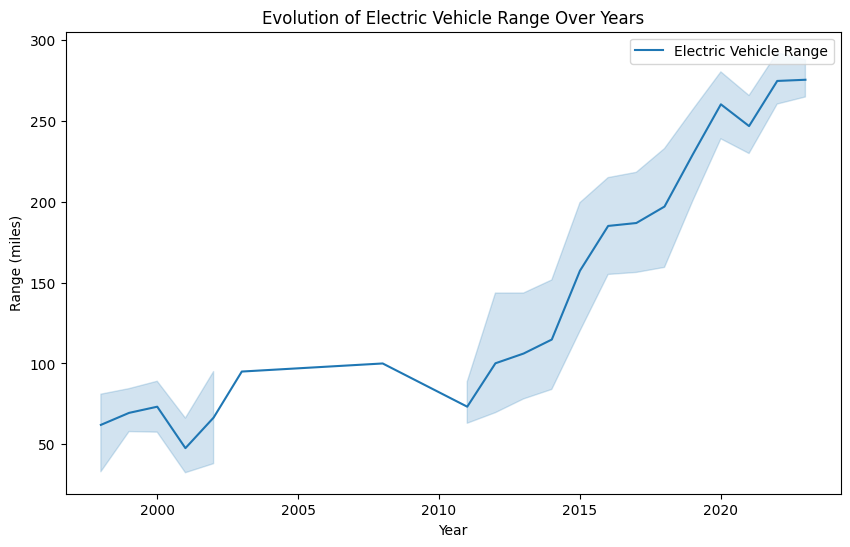

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_vehicle, x='Year', y='range', label='Electric Vehicle Range')
plt.xlabel('Year')
plt.ylabel('Range (miles)')
plt.title('Evolution of Electric Vehicle Range Over Years')
plt.legend()
plt.show()


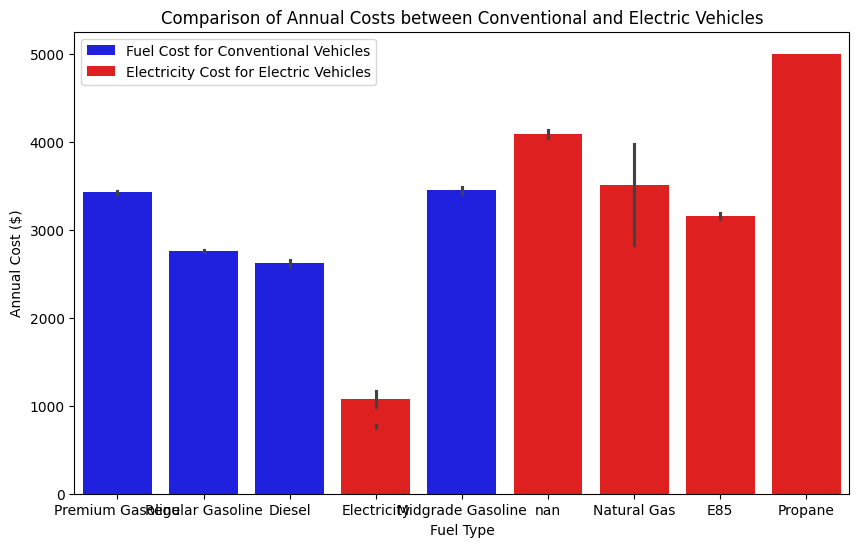

In [26]:
plt.figure(figsize=(10, 6))
# Costos de combustible para vehículos convencionales
sns.barplot(data=df_vehicle, x='fuelType1', y='fuelCost08', color='blue', label='Fuel Cost for Conventional Vehicles')
# Costos de electricidad para vehículos eléctricos
sns.barplot(data=df_vehicle, x='fuelType2', y='fuelCostA08', color='red', label='Electricity Cost for Electric Vehicles')
plt.xlabel('Fuel Type')
plt.ylabel('Annual Cost ($)')
plt.title('Comparison of Annual Costs between Conventional and Electric Vehicles')
plt.legend()
plt.show()


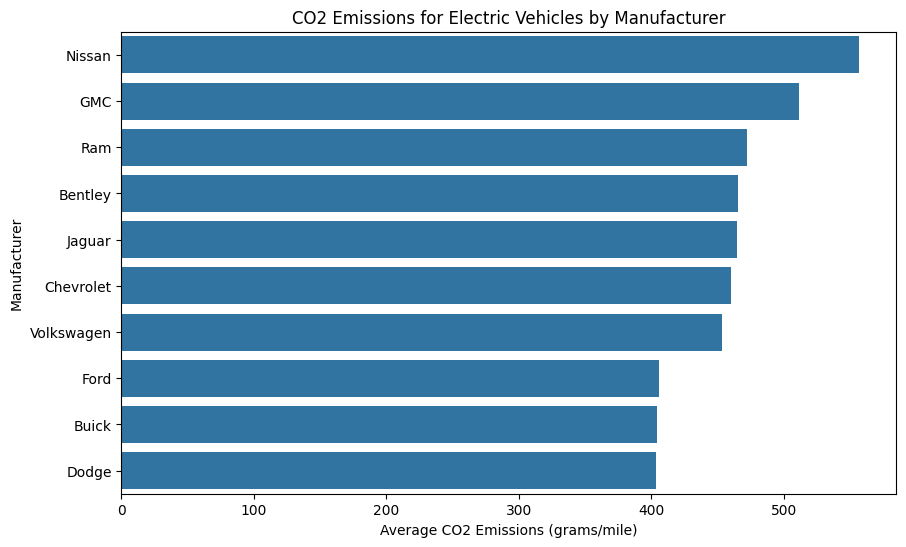

In [27]:
# Filtrar solo vehículos eléctricos
electric_vehicles = df_vehicle[df_vehicle['fuelType2'].notnull()]

# Emisiones de CO2 por fabricante
co2_emissions_electric = electric_vehicles.groupby('Manufacturer')['co2A'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=co2_emissions_electric.values, y=co2_emissions_electric.index)
plt.xlabel('Average CO2 Emissions (grams/mile)')
plt.ylabel('Manufacturer')
plt.title('CO2 Emissions for Electric Vehicles by Manufacturer')
plt.show()


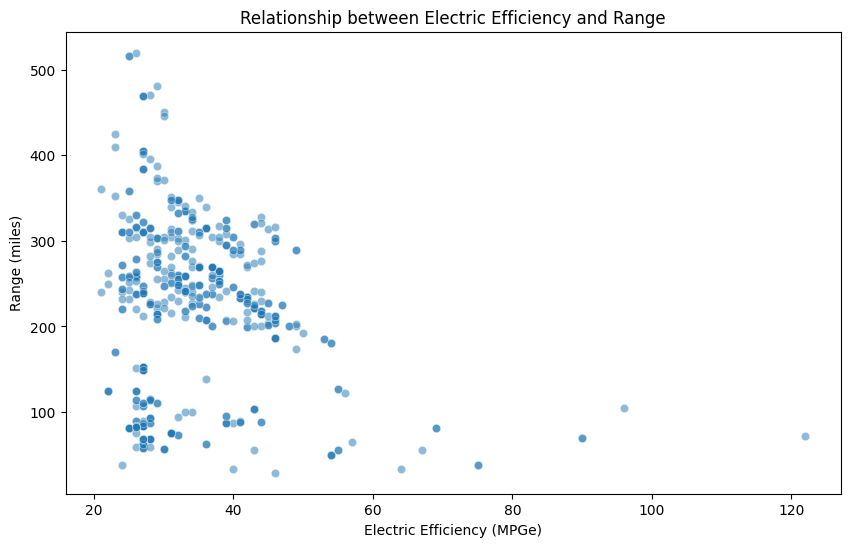

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_vehicle, x='cityE', y='range', alpha=0.5)
plt.xlabel('Electric Efficiency (MPGe)')
plt.ylabel('Range (miles)')
plt.title('Relationship between Electric Efficiency and Range')
plt.show()


In [32]:
nombre_archivo_csv = "df_vehicle.csv"

# Utiliza la función to_csv() para exportar el DataFrame a un archivo CSV
df_vehicle.to_csv(nombre_archivo_csv, index=False)

In [44]:
fp.tipos_cols(df_vehicle)

,Columna,Tipo de Valor,Cantidad,Porcentaje de NaN,Más de un tipo de valor (no NaN)
0,ID,<class 'int'>,46186,0.00%,No
1,ID,NaN,0,0.00%,No
2,Year,<class 'int'>,46186,0.00%,No
3,Year,NaN,0,0.00%,No
4,Manufacturer,<class 'str'>,46186,0.00%,No
5,Manufacturer,NaN,0,0.00%,No
6,Model,<class 'str'>,46186,0.00%,No
7,Model,NaN,0,0.00%,No
8,fuelType1,<class 'str'>,46186,0.00%,No
9,fuelType1,NaN,0,0.00%,No
